<a href="https://colab.research.google.com/github/moran2-cyber/UTS-Pengolahan-Citra_Morando-Malau/blob/main/UTS%20Pengolahan%20Citra/Latihan_2_PC_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import pandas as pd
import math

In [ ]:
img = cv2.imread('moran.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap_abs = cv2.convertScaleAbs(lap)

sharp_lap = cv2.addWeighted(img, 1.0, lap_abs, -1.0, 0)


In [ ]:
F = np.fft.fft2(img)
F_shift = np.fft.fftshift(F)


In [ ]:
# Gaussian HPF function
def gaussian_hpf(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows//2, cols//2
    x = np.linspace(0, rows-1, rows)
    y = np.linspace(0, cols-1, cols)
    X, Y = np.meshgrid(y, x)
    D = np.sqrt((X - ccol)**2 + (Y - crow)**2)

    # HPF = 1 - LPF
    H = 1 - np.exp(-(D**2) / (2*(cutoff**2)))
    return H

cutoffs = [10, 30, 60]
hpf_results = []

for c in cutoffs:
    H = gaussian_hpf(img.shape, c)
    F_hp = F_shift * H
    img_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(F_hp)))
    hpf_results.append(img_hp)



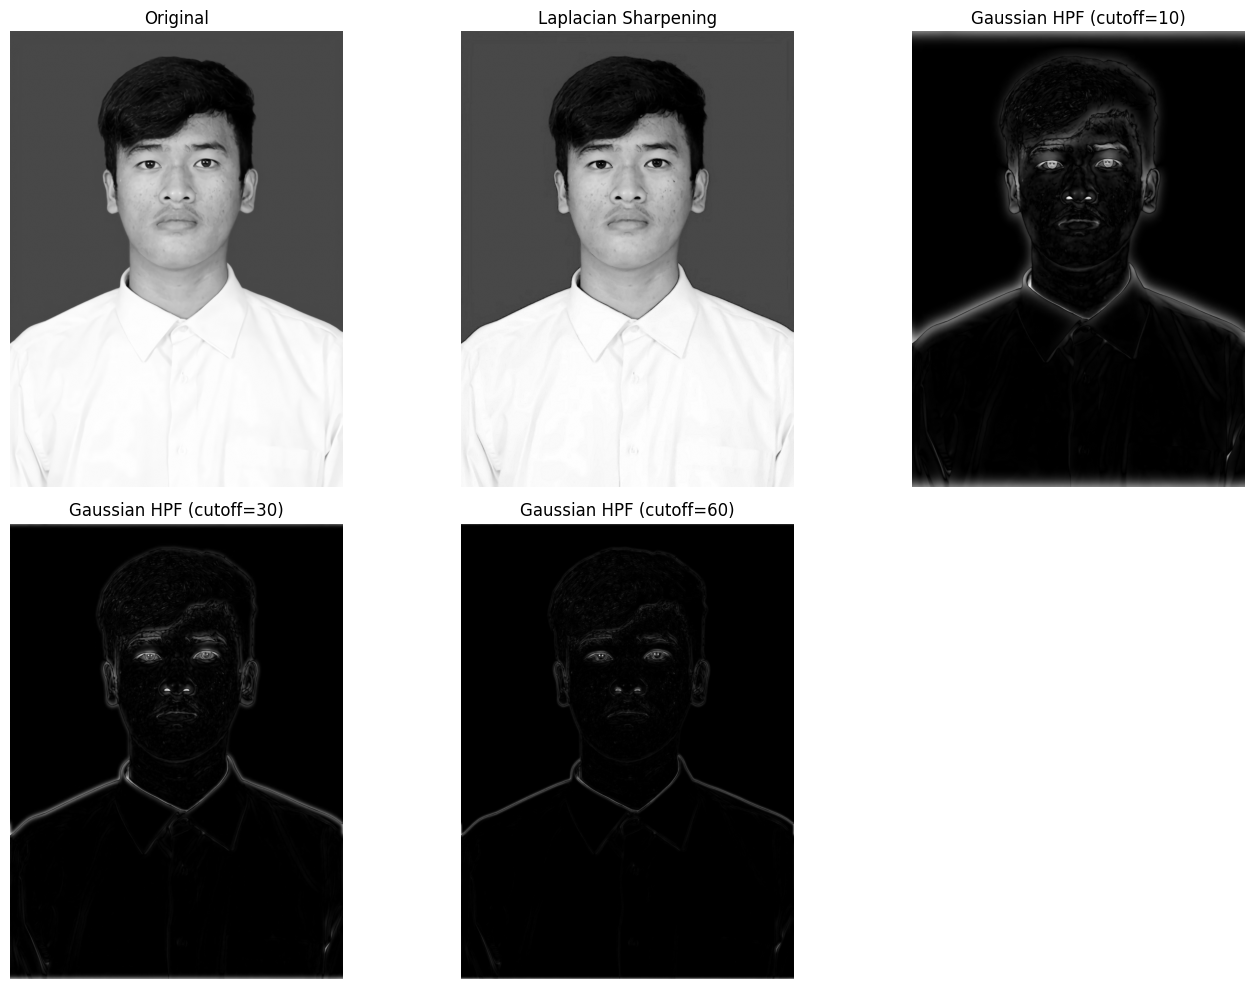

In [ ]:
plt.figure(figsize=(14,10))

plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(sharp_lap, cmap='gray')
plt.title("Laplacian Sharpening")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(hpf_results[0], cmap='gray')
plt.title("Gaussian HPF (cutoff=10)")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(hpf_results[1], cmap='gray')
plt.title("Gaussian HPF (cutoff=30)")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(hpf_results[2], cmap='gray')
plt.title("Gaussian HPF (cutoff=60)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def mse(a, b):
    return np.mean((a - b) ** 2)

def psnr(a, b):
    m = mse(a, b)
    if m == 0:
        return float('inf')
    return 20 * math.log10(255 / math.sqrt(m))

In [ ]:
rows = []

# Laplacian Sharpening
rows.append([
    "Laplacian Sharpening",
    psnr(img, sharp_lap),
    ssim(img, sharp_lap, data_range=sharp_lap.max() - sharp_lap.min())
])

# HPF
for c, r in zip(cutoffs, hpf_results):
    rows.append([
        f"Gaussian HPF cutoff={c}",
        psnr(img, r),
        ssim(img, r, data_range=r.max() - r.min())
    ])


In [ ]:
df = pd.DataFrame(rows, columns=["Metode", "PSNR (dB)", "SSIM"])
print(df)


                   Metode  PSNR (dB)      SSIM
0    Laplacian Sharpening  39.078894  0.950262
1  Gaussian HPF cutoff=10   3.596651  0.084276
2  Gaussian HPF cutoff=30   3.426445  0.036601
3  Gaussian HPF cutoff=60   3.371016  0.026117
